# Popular Data Science Questions

The goal is to use the [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should be created based on subject interest 

## Stack Exchange

### What kind of questions are welcome on this site?

On the [DSSE Help Center for questions](https://datascience.stackexchange.com/help/dont-ask) we find that we should ask the following questions (and this is from what we should [ask](https://datascience.stackexchange.com/help/on-topic)

* Questions that are not subjective (open ended)
* Practical questions about Data Science
* Specific Questions
* Making the question relevant to others (no ranting!)

All of these can be used for the goal here

### What other than questions, does the site's home subdivide into?
* [Questions](https://datascience.stackexchange.com/questions) A list of questions being asked
* [Tags](https://datascience.stackexchange.com/tags) A list of keywords that categorizes questions
* [Users](https://datascience.stackexchange.com/users) A list of Users
* [Unanswered Questions](https://datascience.stackexchange.com/unanswered) Questions with no upvoted or accepted answers

The tagging system is what we need to solve this problem as it allows us to look at the number of questions being asked about each subject.  Also Stack Exchange is heavily community moderated which allows us to trust the tagging system to obtain the conclusions 

### What information is each post?
* The question and answer
* The score for both question and answer
* The posts author
* The posts title
* The posts body

For questions
* How active is the question
* When it was viewed
* Related questions
* The question's tags
* How many users have it quoted

## Stack Exchange Data Explorer

From the table names here a few that we can use
* Posts
* Tags
* PostTags
* TagSynonyms

The posts table is the best table here as it focuses on what was posted and its related tags

The tags table returns the following:

|id|TagName|Count|ExcerptPostID|WikiPostID|
|--|--------|----|-------------|----------|
|1|definitions|28|105|104|
|2|machine-learning|7223|4909|4908|
|3|bigdata|424|66|65|
|5|data-mining|972|80|79|
|6|databases|82|8960|8959|
|8|libsvm|14|18|17|
|10|scalability|27|
|11|efficiency|29|142|141|
|12|performance|117|
|13|nosql|23|119|118
|14|relational-dbms|11|
|15|clustering|884|145|144|
|16|octave|14|68|67|
|17|k-means|284|8958|8957|
|19|algorithms|311|8932|8931
|21|tools|57|

This doesn't tell us what tags are popular just how often each tag was used

# Getting the Data

Query to get the required data is as follows:

```SELECT Id, PostTypeId, CreationDate, 
  Score, ViewCount, Tags, 
  AnswerCount, FavoriteCount 
FROM Posts
WHERE PostTypeId  = 1 AND YEAR(CreationDate) = 2019;```

Results of that query are below

|Id|PostTypeID|CreationDate|Score|ViewCount|Tags|AnswerCount|FavoriteCount|
|--|----------|------------|-----|---------|----|-----------|-------------|
|65291|1|2019-12-22 21:18:43|1|22|neural-network rnn word-embedding sword2vec recurrent-neural-net|1|
|65294|1|2019-12-22 22:38:50|2|40|neural-network activation-function social-network-analysis weighted-data neural|1|
|65295|1|2019-12-22 23:46:38|0|26|python pandas|1|
|65299|1|2019-12-23 02:50:56|0|30|machine-learning gradient-descent backpropagation math|1|
|65302|1|2019-12-23 03:31:49|0|9|deep-learning transfer-learningi mage-preprocessing yolo|0|

## Exploring the Data

In [1]:
# Import everything we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

Get information about the questions dataframe by running ```DataFrame.info()```

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


FavoriteCounts is the only column with missing values meaning that the response wans't favorited.  The types are suited for each column we won't need floats once FavoriteCounts is filled in

Checking the tags value using the following

In [5]:
questions['Tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

Tags are strings and there is a [limit](https://meta.stackexchange.com/questions/18878/how-do-i-correctly-tag-my-questions/18879#18879) of five tags.  We'll keep them as a list as it doesn't help to separate them out to track questions (one column for each tag with a total of 5 columns per question)

# Cleaning the Data

In [6]:
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

In [7]:
questions.fillna(value={'FavoriteCount': 0}, inplace=True)

In [8]:
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

In [9]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0.0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0.0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0.0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0.0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0.0


In [10]:
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [11]:
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [12]:
questions['Tags'] = questions['Tags'].str.replace('^<|>$','').str.split('><')

In [13]:
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
8231,44235,2019-01-19 13:36:37,0,6,"[training, dqn]",0,0
7720,54224,2019-06-21 14:18:37,0,10,"[r, performance, linear-algebra, library]",0,0
2845,48093,2019-03-27 15:06:43,0,63,"[tensorflow, dataset]",0,0


In [14]:
questions['Tags'].sample(3)

3399    [deep-learning, tensorflow, machine-learning-m...
5742    [classification, tensorflow, multiclass-classi...
4488            [classification, scikit-learn, pipelines]
Name: Tags, dtype: object

In [15]:
questions[questions['Id'] == 56382]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
511,56382,2019-07-25 15:00:20,0,34,"[machine-learning, python, pandas, natural-lan...",0,0


In [16]:
questions[questions['Id'] == 58312]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2178,58312,2019-08-28 09:44:00,1,41,"[neural-network, pytorch]",0,1


# Most Used and Most Viewed

Counting tags used using frequency table

In [17]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


In [19]:
questions['Tags'].iloc[1]

['machine-learning', 'regression', 'linear-regression', 'regularization']

In [22]:
tag_count = dict()

# generate frequency table
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1


In [23]:
tag_count

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

In [25]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')

In [26]:
tag_count

,0
visualization,126
vector-space-models,7
bert,64
jupyter,41
implementation,9
scipy,40
k-means,81
gaussian,20
ann,2
data-science-model,186


In [27]:
tag_count.rename(columns={0: 'Count'},inplace=True)
tag_count

,Count
visualization,126
vector-space-models,7
bert,64
jupyter,41
implementation,9
scipy,40
k-means,81
gaussian,20
ann,2
data-science-model,186


In [28]:
tag_count.head(10)

,Count
visualization,126
vector-space-models,7
bert,64
jupyter,41
implementation,9
scipy,40
k-means,81
gaussian,20
ann,2
data-science-model,186


In [30]:
most_used = tag_count.sort_values(by='Count').tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


Graph of most used

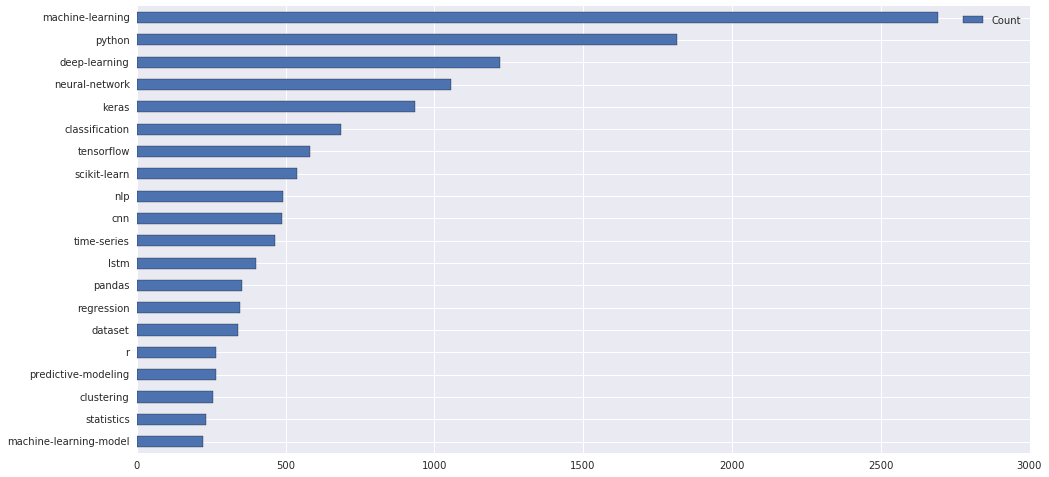

In [31]:
most_used.plot(kind='barh', figsize=(16,8))

Python, dataset and r are very broad tags and thus not helpful in this context

Using enumerate as an example

In [32]:
some_iterable = 'Iterate This!'

for i, c in enumerate(some_iterable):
    print(i,c)

0 I
1 t
2 e
3 r
4 a
5 t
6 e
7  
8 T
9 h
10 i
11 s
12 !


In [33]:
tag_view_count = dict()

# Generate Frequency Table
for idx, tags in enumerate(questions['Tags']):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += questions['ViewCount'].iloc[idx]
        else:
            tag_view_count[tag] = 1

tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0: 'ViewCount'},inplace=True)

In [34]:
tag_view_count

,ViewCount
visualization,18895
vector-space-models,1373
bert,28832
jupyter,8420
implementation,606
scipy,6696
k-means,14160
gaussian,2999
ann,12
data-science-model,23173


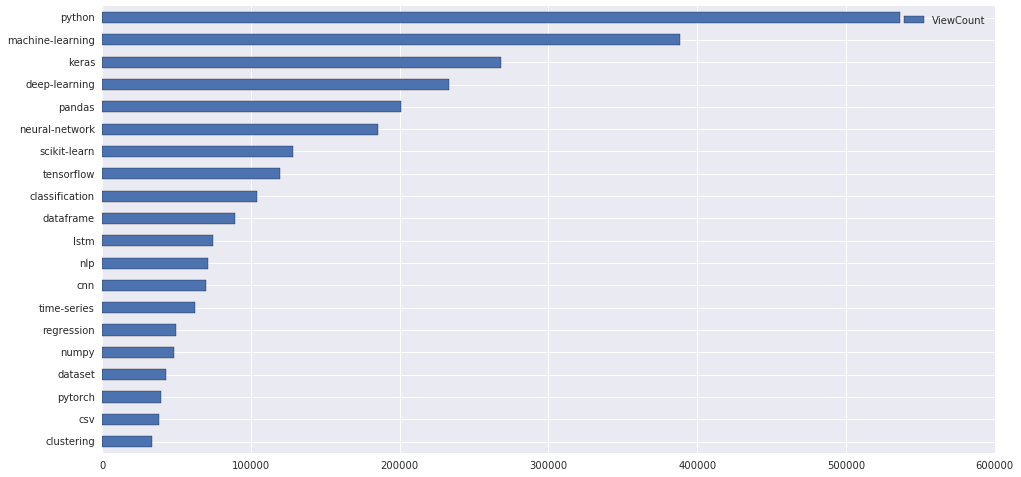

In [35]:
most_viewed = tag_view_count.sort_values(by='ViewCount').tail(20)
most_viewed.plot(kind='barh',figsize = (16,8))

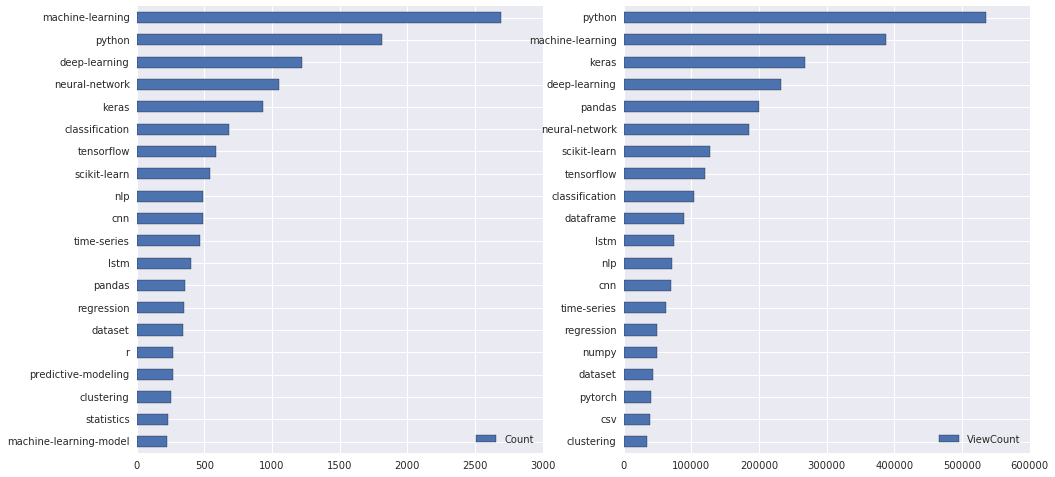

In [37]:
# Side by Side plots
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24,10))
most_used.plot(kind='barh', ax=axes[0], figsize=(16,8))
most_viewed.plot(kind='barh', ax=axes[1], figsize = (16,8))

Create two dataframes that combine the most viewed tags and most used tags

In [38]:
in_used = pd.merge(most_used, most_viewed, how='left',left_index=True,right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how='right',left_index=True,right_index=True)

In [39]:
in_used.head()

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33824.0
predictive-modeling,265,NaN
r,268,NaN


In [40]:
in_viewed.head()

,Count,ViewCount
clustering,257.0,33824
csv,NaN,38453
pytorch,NaN,39887
dataset,340.0,43133
numpy,NaN,48556


# Relations Between Tags

We can count how many times tags appear together as pairs

In [42]:
# get the tag count
all_tags = list(tag_count.index)
all_tags

['visualization',
 'vector-space-models',
 'bert',
 'jupyter',
 'implementation',
 'scipy',
 'k-means',
 'gaussian',
 'ann',
 'data-science-model',
 'ensemble-learning',
 'inceptionresnetv2',
 'spyder',
 'keras',
 'python-3.x',
 'clustering',
 'multi-instance-learning',
 'machine-translation',
 'ngrams',
 'nlp',
 'ml',
 'sequence',
 'dump',
 'opencv',
 'bioinformatics',
 'gru',
 'rnn',
 'dbscan',
 'nvidia',
 'scraping',
 'convergence',
 'yolo',
 'encoder',
 'mse',
 'graphs',
 'sematic-similarity',
 'dataset',
 'association-rules',
 'naive-bayes-classifier',
 'tsne',
 'finite-precision',
 'hive',
 'least-squares-svm',
 'categorical-encoding',
 '.net',
 'libsvm',
 'preprocessing',
 'class-imbalance',
 'research',
 'supervised-learning',
 'semi-supervised-learning',
 'jaccard-coefficient',
 'autoencoder',
 'software-development',
 'data-imputation',
 'object-recognition',
 'c',
 'categorical-data',
 'stacked-lstm',
 'alex-net',
 'bayes-error',
 'experiments',
 'glm',
 'difference',
 'text

We can create a dataframe where each tag is a row and column

In [43]:
associations = pd.DataFrame(index=all_tags,columns=all_tags)
associations

,visualization,vector-space-models,bert,jupyter,implementation,scipy,k-means,gaussian,ann,data-science-model,...,learning-to-rank,proximal-svm,chatbot,data.table,sentiment-analysis,automl,ai,error-handling,self-driving,ocr
visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector-space-models,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jupyter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
implementation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scipy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k-means,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gaussian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-science-model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
associations.iloc[0:4,0:4]

,visualization,vector-space-models,bert,jupyter
visualization,NaN,NaN,NaN,NaN
vector-space-models,NaN,NaN,NaN,NaN
bert,NaN,NaN,NaN,NaN
jupyter,NaN,NaN,NaN,NaN


In [46]:
associations.fillna(0,inplace=True)
associations.head()

,visualization,vector-space-models,bert,jupyter,implementation,scipy,k-means,gaussian,ann,data-science-model,...,learning-to-rank,proximal-svm,chatbot,data.table,sentiment-analysis,automl,ai,error-handling,self-driving,ocr
visualization,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vector-space-models,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bert,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jupyter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
implementation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# fill the dataframe
for tags in questions['Tags']:
    associations.loc[tags,tags] +=1
associations.head()

,visualization,vector-space-models,bert,jupyter,implementation,scipy,k-means,gaussian,ann,data-science-model,...,learning-to-rank,proximal-svm,chatbot,data.table,sentiment-analysis,automl,ai,error-handling,self-driving,ocr
visualization,252,0,0,4,0,0,2,0,0,4,...,0,0,0,0,0,0,0,0,0,2
vector-space-models,0,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bert,0,0,128,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
jupyter,4,0,0,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
implementation,0,0,0,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
associations

,visualization,vector-space-models,bert,jupyter,implementation,scipy,k-means,gaussian,ann,data-science-model,...,learning-to-rank,proximal-svm,chatbot,data.table,sentiment-analysis,automl,ai,error-handling,self-driving,ocr
visualization,252,0,0,4,0,0,2,0,0,4,...,0,0,0,0,0,0,0,0,0,2
vector-space-models,0,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bert,0,0,128,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
jupyter,4,0,0,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
implementation,0,0,0,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scipy,0,0,0,0,0,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k-means,2,0,0,0,0,0,162,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gaussian,0,0,0,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
ann,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
data-science-model,4,0,0,0,0,0,0,0,0,372,...,0,0,0,0,0,0,4,0,0,0


Adding a color map to show most used tags

In [50]:
relations_most_used = associations.loc[most_used.index,most_used.index]
relations_most_used

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,448,6,6,42,14,24,16,8,10,14,8,8,36,18,42,34,20,38,74,278
statistics,6,468,6,32,32,34,32,6,2,44,2,6,12,0,38,6,22,24,70,178
clustering,6,6,514,0,32,10,4,10,6,40,0,18,48,0,24,0,16,4,90,122
predictive-modeling,42,32,0,530,26,14,56,8,26,62,12,2,24,12,54,22,26,64,70,246
r,14,32,32,26,536,12,20,4,6,44,4,8,2,2,20,20,18,10,48,126
dataset,24,34,10,14,12,680,12,28,14,12,22,22,18,18,56,26,40,64,106,198
regression,16,32,4,56,20,12,694,12,22,48,12,4,74,18,68,62,84,42,118,238
pandas,8,6,10,8,4,28,12,708,14,38,2,6,74,6,6,6,2,2,488,124
lstm,10,2,6,26,6,14,22,14,804,174,48,38,4,86,40,266,138,206,122,142
time-series,14,44,40,62,44,12,48,38,174,932,16,0,24,18,50,102,66,88,210,262


In [51]:
# helper function to styleize cells
def style_cells(x):
    helper_df = pd.DataFrame('',index=x.index,columns=x.columns)
    helper_df.loc['time-series','r'] = 'background-color:yellow'
    helper_df.loc['r','time-series'] = 'background-color:yellow'
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = 'color:blue'
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,448,6,6,42,14,24,16,8,10,14,8,8,36,18,42,34,20,38,74,278
statistics,6,468,6,32,32,34,32,6,2,44,2,6,12,0,38,6,22,24,70,178
clustering,6,6,514,0,32,10,4,10,6,40,0,18,48,0,24,0,16,4,90,122
predictive-modeling,42,32,0,530,26,14,56,8,26,62,12,2,24,12,54,22,26,64,70,246
r,14,32,32,26,536,12,20,4,6,44,4,8,2,2,20,20,18,10,48,126
dataset,24,34,10,14,12,680,12,28,14,12,22,22,18,18,56,26,40,64,106,198
regression,16,32,4,56,20,12,694,12,22,48,12,4,74,18,68,62,84,42,118,238
pandas,8,6,10,8,4,28,12,708,14,38,2,6,74,6,6,6,2,2,488,124
lstm,10,2,6,26,6,14,22,14,804,174,48,38,4,86,40,266,138,206,122,142
time-series,14,44,40,62,44,12,48,38,174,932,16,0,24,18,50,102,66,88,210,262


Times series was used with r 44 times (although this looks like it got multiplied by 2 so 22 times and machine learning was used 5386 times (2693 times)

In [53]:
associations.loc['machine-learning','machine-learning']

5386

In [54]:
# Removing the blue values
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN


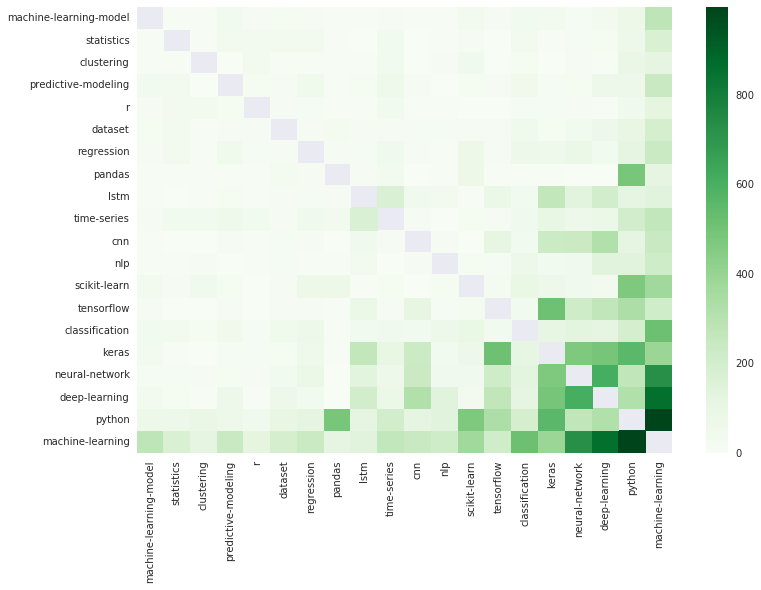

In [55]:
# Create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used,cmap='Greens',annot=False)

Most used tags have the strongest relationships but this is not necessarily helpful (data mining techniques will have to be used here)

# Enter Domain Knowledge

* Deep learning is a subset of machine learning
* neural-network is a mimic of a biological neural network
* machine learning is a system that improves with experience
* keras is a neural network library
* tensorflow is a library for machine learning
* scikit-learn is a module for machine learning built on the basic data science libraries
* classification Supervised learning that categorizes things

All of these are related to deep learning and according to the heatmap that is the most popular topic

# Just a Fad?

In [56]:
all_q = pd.read_csv('all_questions.csv',parse_dates=['CreationDate'])

In [57]:
all_q.head(20)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
5,45428,2019-02-12 05:43:18,<cnn>
6,45430,2019-02-12 06:20:30,<machine-learning><learning>
7,45431,2019-02-12 07:26:56,<machine-learning>
8,45433,2019-02-12 08:56:23,<python><keras><tensorflow><lstm>
9,45434,2019-02-12 09:09:01,<neural-network><feature-selection><mlp>


In [58]:
all_q['Tags'] = all_q['Tags'].str.replace('^<|>$','').str.split('><')
all_q.head(20)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
5,45428,2019-02-12 05:43:18,[cnn]
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]"
7,45431,2019-02-12 07:26:56,[machine-learning]
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]"


In [61]:
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


In [63]:
dl_tags = ['keras','tensorflow','scikit-learn','deep-learning','neural-network','cnn','lstm']

The tags were obtained from the previous lesson and from the heatmap

In [64]:
#  helper function
def class_deep_learning(tags):
    for tag in tags:
        if tag in dl_tags:
            return 1
    return 0

# Create new column called DeepLearning
all_q['DeepLearning'] = all_q['Tags'].apply(class_deep_learning)

In [65]:
all_q.sample(10) # random sample of 10

,Id,CreationDate,Tags,DeepLearning
21547,36895,2018-08-13 19:37:29,"[deep-learning, lstm, training, recurrent-neur...",1
10917,42376,2018-12-10 01:18:46,"[classification, data-mining, k-nn]",0
15521,44778,2019-01-29 16:23:55,"[deep-learning, lstm]",1
5251,26763,2018-01-17 22:26:54,"[neural-network, embeddings]",1
10145,60755,2019-09-25 14:31:31,"[pyspark, jupyter]",0
10409,42143,2018-12-05 06:59:33,"[dataset, time-series]",0
16373,45107,2019-02-05 16:44:46,[predictive-modeling],0
16703,45314,2019-02-09 18:24:50,"[python, pandas]",0
10515,8861,2015-11-16 15:14:37,"[information-retrieval, evaluation]",0
19613,13215,2016-08-05 03:01:04,"[data-mining, data, open-source]",0


Results are promising!

We are going to focus on each quarter as technology for data science doesn't change as frequently

In [66]:
# Remove dates for 2020
all_q = all_q[all_q['CreationDate'].dt.year < 2020]
all_q.head(20)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


We will create a column that shows what quarter a question was asked

Quarters January-March Q1, April-June Q2 July-September Q3 October-December Q4

In [68]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month - 1) // 3) + 1)
    return '{y}Q{q}'.format(y=year, q=quarter)

all_q['Quarter'] = all_q['CreationDate'].apply(fetch_quarter)
all_q.head(20)

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
5,45428,2019-02-12 05:43:18,[cnn],1,19Q1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0,19Q1
7,45431,2019-02-12 07:26:56,[machine-learning],0,19Q1
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1,19Q1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,19Q1


We will track by quarter and count: 
1. The number of deep learning questions
2. The total number of questions
3. The ratio of deep learning questions to total questions

In [69]:
quarterly = all_q.groupby('Quarter').agg({'DeepLearning': ['sum','size']})

In [70]:
quarterly

DeepLearning      
                 sum  size
Quarter                   
14Q2               9   157
14Q3              13   189
14Q4              21   216
15Q1              18   190
15Q2              28   284
15Q3              45   311
15Q4              66   382
16Q1             110   516
16Q2             109   518
16Q3             161   585
16Q4             177   527
17Q1             242   698
17Q2             226   647
17Q3             247   714
17Q4             353   898
18Q1             554  1221
18Q2             566  1448
18Q3             685  1512
18Q4             531  1294
19Q1             804  1987
19Q2             935  2393
19Q3             941  2394
19Q4             809  2036

In [71]:
quarterly.columns = ['DeepLearning','TotalQuestions']

In [72]:
quarterly

,DeepLearning,TotalQuestions
Quarter,,
14Q2,9,157
14Q3,13,189
14Q4,21,216
15Q1,18,190
15Q2,28,284
15Q3,45,311
15Q4,66,382
16Q1,110,516
16Q2,109,518


In [73]:
quarterly['DeepLearningRate'] = quarterly['DeepLearning'] / quarterly['TotalQuestions']

In [74]:
quarterly

,DeepLearning,TotalQuestions,DeepLearningRate
Quarter,,,
14Q2,9,157,0.057325
14Q3,13,189,0.068783
14Q4,21,216,0.097222
15Q1,18,190,0.094737
15Q2,28,284,0.098592
15Q3,45,311,0.144695
15Q4,66,382,0.172775
16Q1,110,516,0.213178
16Q2,109,518,0.210425


In [75]:
quarterly.reset_index(inplace=True)

In [76]:
quarterly.sample(10)

,Quarter,DeepLearning,TotalQuestions,DeepLearningRate
4,15Q2,28,284,0.098592
8,16Q2,109,518,0.210425
1,14Q3,13,189,0.068783
9,16Q3,161,585,0.275214
19,19Q1,804,1987,0.404630
10,16Q4,177,527,0.335863
20,19Q2,935,2393,0.390723
2,14Q4,21,216,0.097222
16,18Q2,566,1448,0.390884
21,19Q3,941,2394,0.393066


Plot to compare Deep Learning Questions versus total questions

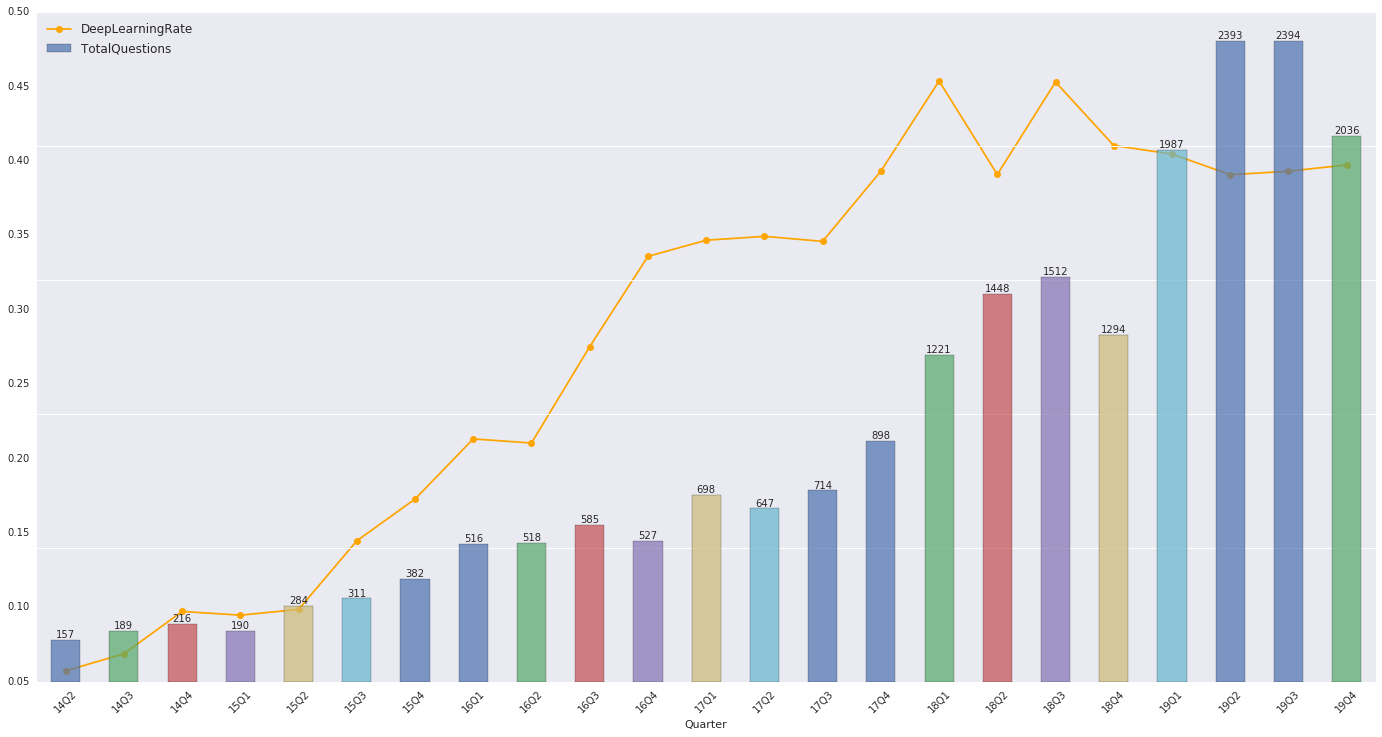

In [77]:
ax1 = quarterly.plot(x='Quarter', y='DeepLearningRate',
                    kind='line', linestyle='-', marker='o', color='orange',
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x='Quarter', y='TotalQuestions',
                     kind='bar', ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha='center', va='bottom')
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc='upper left', prop={'size': 12})


for ax in (ax1, ax2):
    for where in ('top', 'right'):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

According to the graph deep learning started increasing since the data science stack exchange was created and then peaked.  However, there is no sign of deep learning decreasing on this stack exchange so therefore we can create deep learning content